# Построение МНРП

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize as opt

In [2]:
def polynomial(c, x):
    value = 0
    i = 0
    for coef in c:
        value += coef * x ** i
        i += 1
    return value

def polynomial_der(c, x):
    value = 0
    i = 1
    for coef in c[1:]:
        value += i * coef * x ** (i - 1)
        i += 1
    return value

In [3]:
def e(x):
    return np.sin(x) - polynomial(c[:-1], x)

def e_der(x):
    return np.cos(x) - polynomial_der(c[:-1], x)


In [4]:
def approx(x):
     return polynomial(c[:-1], x)

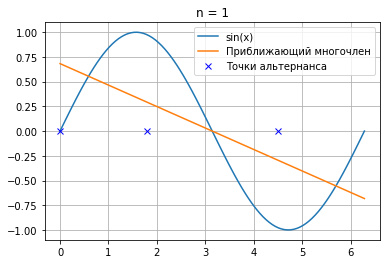

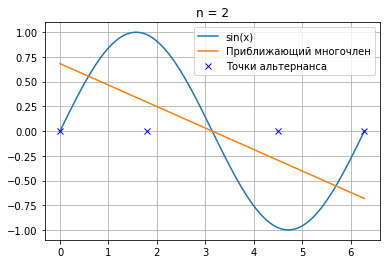

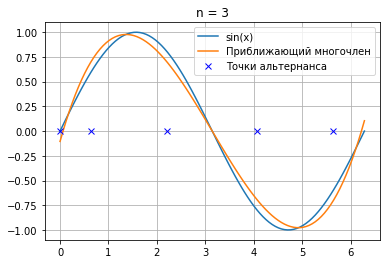

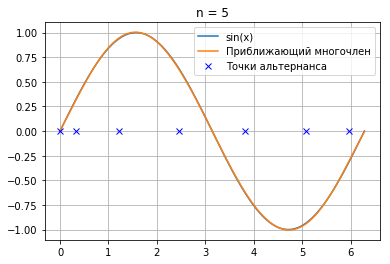

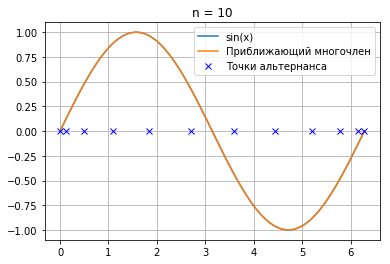

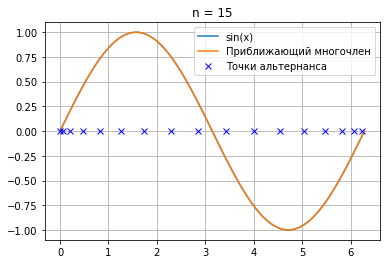

In [24]:
eps = 1e-12
a = 0
b = 2 * math.pi
norm = []
xx = np.linspace(a, b, 100)

for n in range(1, 16):
#Построение системы
    A = np.zeros((n + 2, n + 2))
    f = np.zeros(n + 2)
    xx_n = np.linspace(a, b, n + 2)
    for k in range(100):
        for i in range(n + 2):
            for j in range(n + 1):
                A[i][j] = xx_n[i] ** j
            A[i][n + 1] = (-1)**i
        f = np.sin(xx_n)

        c = np.linalg.solve(A, f)
#Нахождение корней
        z = [0]
        for i in range(0, n + 1):
            if np.abs(e(xx_n[i])) < eps:
                z.append(xx_n[i])
                continue

            z.append(opt.bisect(e, xx_n[i], xx_n[i + 1]))
        z.append(b)
#Нахождение экстремумов
        res = []
        for i in range(0, n + 2):
            try:
                res.append(opt.bisect(e_der, z[i], z[i + 1]))
            except:
                res.append(z[i] if abs(e(z[i])) > abs(e(z[i + 1])) else z[i + 1])
        if np.abs(np.max(np.abs(e(xx))) - np.abs(c[-1])) < eps:
            break
        xx_n = np.array(res)
        
    if n in [0, 1, 2, 3, 5, 10, 15]:
        plt.figure()
        plt.title('n = {0}'.format(n))
        plt.grid()
        plt.plot(xx, np.sin(xx), label = 'sin(x)')
        plt.plot(xx, approx(xx), label = 'Приближающий многочлен')
        plt.plot(res, [0] * len(res), 'x', color = 'blue', label = 'Точки альтернанса')
        plt.legend()

    norm.append(np.max(np.abs(e(xx))))

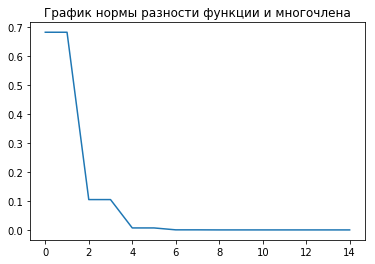

In [25]:
plt.figure()
plt.title('График нормы разности функции и многочлена')
plt.plot(norm)